The data I am using is secondary data. This research aims to identify the factors that influence the World Happiness using multiple linear regression with the Python programming language.
<br/>
<br>
The variables I selected are:
1. Y: Happiness

2. X1: GDP Per Capita

3. X2: Social Support

4. X3: Healthy Life Expectancy

5. X4: Freedom To Make Life Choiches

6. X5: Generosity

7. X6: Perceptions Of Corruption
<br/>
<br>

# **1. PreProcessing**

In [10]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [14]:
# Loading the dataset
dt = pd.read_excel("World Hapiness 2022.xlsx", index_col = 0)
dt.head(10)

,Country,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
RANK,,,,,,,,
1,Finland,7821,1892.0,1258.0,0.775,0.736,0.109,0.534
2,Denmark,7636,1953.0,1243.0,0.777,0.719,0.188,0.532
3,Iceland,7557,1936.0,1320.0,0.803,0.718,0.270,0.191
4,Switzerland,7512,2026.0,1226.0,0.822,0.677,0.147,0.461
5,Netherlands,7415,1945.0,1206.0,0.787,0.651,0.271,0.419
6,Luxembourg*,7404,2209.0,1155.0,0.790,0.700,0.120,0.388
7,Sweden,7384,1920.0,1204.0,0.803,0.724,0.218,0.512
8,Norway,7365,1997.0,1239.0,0.786,0.728,0.217,0.474
9,Israel,7364,1826.0,1221.0,0.818,0.568,0.155,0.143


In [15]:
# Check for missing values
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 1 to 146
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       146 non-null    object 
 1   Happiness_score               146 non-null    int64  
 2   GDP_per_capita                145 non-null    float64
 3   Social_support                145 non-null    float64
 4   Healthy_life_expectancy       145 non-null    float64
 5   Freedom_to_make_life_choices  145 non-null    float64
 6   Generosity                    145 non-null    float64
 7   Perceptions_of_corruption     145 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 10.3+ KB


In [16]:
# Find the mean of each column with missing data
dt.isna().sum()
# Calculate the mean of each column with missing data
GDP_mean = dt.GDP_per_capita.mean()
Social_mean = dt.Social_support.mean()
Healthy_mean = dt.Healthy_life_expectancy.mean()
Freedom_mean = dt.Freedom_to_make_life_choices.mean()
Generosity_mean = dt.Generosity.mean()
Perceptions_mean = dt.Perceptions_of_corruption.mean()

In [17]:
dt.GDP_per_capita = dt.GDP_per_capita.fillna(dt.GDP_per_capita.mean())
dt.Social_support = dt.Social_support.fillna(dt.Social_support.mean())
dt.Healthy_life_expectancy = dt.Healthy_life_expectancy.fillna(dt.Healthy_life_expectancy.mean())
dt.Freedom_to_make_life_choices = dt.Freedom_to_make_life_choices.fillna(dt.Freedom_to_make_life_choices.mean())
dt.Generosity = dt.Generosity.fillna(dt.Generosity.mean())
dt.Perceptions_of_corruption = dt.Perceptions_of_corruption.fillna(dt.Perceptions_of_corruption.mean())

In [18]:
# Check again for missing values
dt.isnull().sum()

,0
Country,0
Happiness_score,0
GDP_per_capita,0
Social_support,0
Healthy_life_expectancy,0
Freedom_to_make_life_choices,0
Generosity,0
Perceptions_of_corruption,0


Since there is no more missing data, we can proceed to the next analysis.

# **2. Visualization**

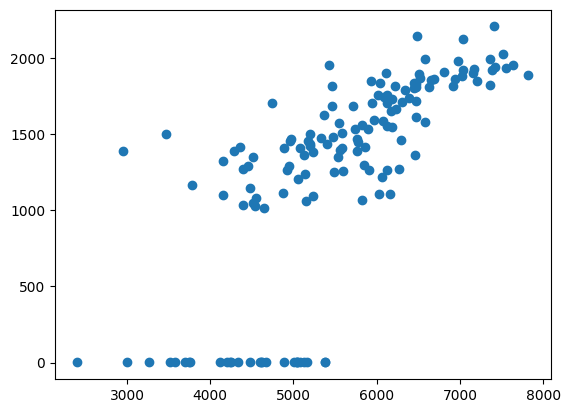

In [19]:
# Scatterplot
plt.scatter(dt['Happiness_score'],dt['GDP_per_capita'])


Since the plots form a straight line, I suspect that the two variables still have a relationship with each other. The data is concentrated in one area, which indicates that the data is not homogeneous. Additionally, the data forming a straight line around GDP (approximately 0) indicates the presence of an outlier in the variable.

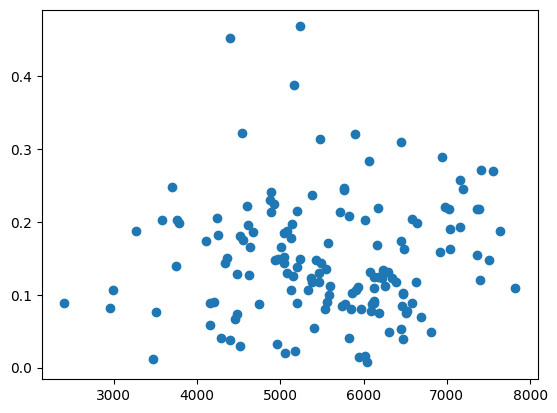

In [20]:
plt.scatter(dt['Happiness_score'],dt['Generosity'])

Since the plot formed in the chart above is very random, we suspect that there is no relationship between the two variables. This also indicates that the data variance is homogeneous.

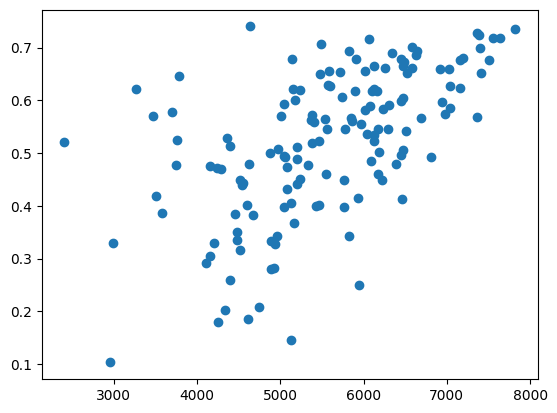

In [21]:
plt.scatter(dt['Happiness_score'],dt['Freedom_to_make_life_choices'])

Since the plot formed in the chart above still appears to form a straight line, we suspect that there is still a relationship between the two variables.

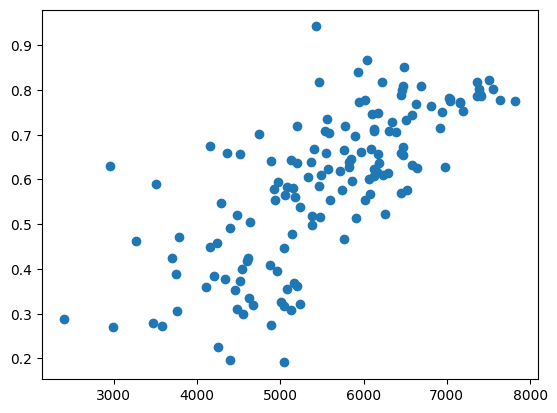

In [22]:
plt.scatter(dt['Happiness_score'],dt['Healthy_life_expectancy'])

Since the plot still resembles a straight line, we suspect that the two variables above still have a relationship

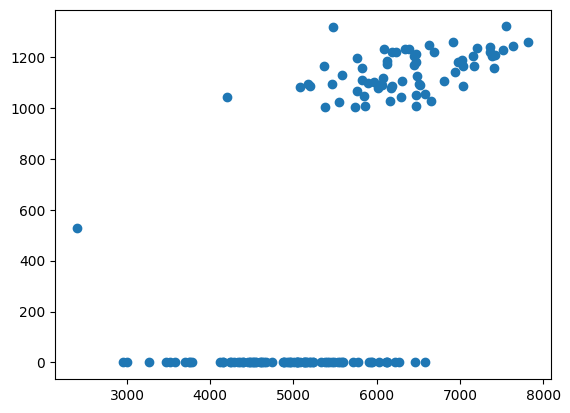

In [23]:
plt.scatter(dt['Happiness_score'],dt['Social_support'])

Karena plot tidak membentuk garis lurus, kami dapat menduga bahwa kedua variabel tidak memiliki hubungan dengan satu sama lain. Sebaran data berpusat di satu area, hal ini menunjukkan bahwa data tidak homogen. Selain itu, data yang membentuk garis lurus pada Social Support (kira kira) 0 itu mengindikasikan adanya outlier pada variabel.

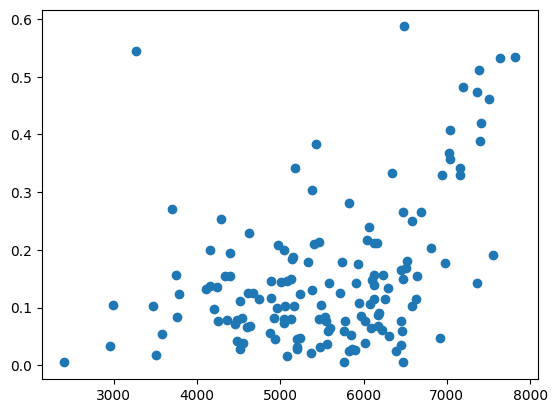

In [24]:
plt.scatter(dt['Happiness_score'],dt['Perceptions_of_corruption'])

Karena plot yang terbentuk pada chart di atas sangatlah acak, kami menduga jika tidak ada hubungan antara kedua variabel di atas. Hal ini juga menggambarkan bahwa varians data adalah homogen.

# **3. Descriptive statistics**

In [25]:
# Determining the central tendency and dispersion of the data
dt.describe()

,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,5553.575342,1265.706345,528.218759,0.590214,0.520793,0.148393,0.155848
std,1086.842607,672.433406,571.749029,0.169436,0.139345,0.081883,0.126860
min,2404.000000,0.570000,0.064000,0.191000,0.103000,0.007000,0.005000
25%,4888.750000,1101.250000,0.732000,0.468000,0.442500,0.089000,0.069500
50%,5568.500000,1445.500000,0.963000,0.621500,0.543500,0.134500,0.123500
75%,6305.000000,1784.750000,1114.250000,0.719750,0.626000,0.197750,0.198500
max,7821.000000,2209.000000,1320.000000,0.942000,0.740000,0.468000,0.587000


Based on the results above, we can conclude that:
* **The Happiness Score** variable has 146 observations, with a minimum value of 2404 and a maximum value of 7821. The average is 5553.575, and the standard deviation is 1086.843. The first quartile is 4888.75, the second quartile (median) is 5568.5, and the third quartile is 6305.

* **The GDP Per Capita** variable has 146 observations, with a minimum value of 0.57 and a maximum value of 2209. The average is 1265.7063, and the standard deviation is 672.4334. The first quartile is 1101.25, the second quartile (median) is 1445.5, and the third quartile is 1784.75.

* **The Social Support** variable has 146 observations, with a minimum value of 0.064 and a maximum value of 1320. The average is 528.2188, and the standard deviation is 571.749. The first quartile is 0.732, the second quartile (median) is 0.963, and the third quartile is 114.25.

* **The Healthy Life Expectancy** variable has 146 observations, with a minimum value of 0.191 and a maximum value of 0.942. The average is 0.5902, and the standard deviation is 0.1694. The first quartile is 0.468, the second quartile (median) is 0.6215, and the third quartile is 0.71975.

* **The Freedom To Make Life Choices** variable has 146 observations, with a minimum value of 0.103 and a maximum value of 0.74. The average is 0.5208, and the standard deviation is 0.1393. The first quartile is 0.4425, the second quartile (median) is 0.5435, and the third quartile is 0.626.

* **The Generosity** variable has 146 observations, with a minimum value of 0.007 and a maximum value of 0.468. The average is 0.1484, and the standard deviation is 0.0819. The first quartile is 0.089, the second quartile (median) is 0.1345, and the third quartile is 0.1978.

* **The Perceptions Of Corruption** variable has 146 observations, with a minimum value of 0.005 and a maximum value of 0.587. The average is 0.1558, and the standard deviation is 0.1269. The first quartile is 0.0695, the second quartile (median) is 0.1235, and the third quartile is 0.1985.

# **4. Correlation**

In [39]:
correlation_matrix = dt.drop('Country', axis=1).corr()
correlation_matrix

,Happiness_score,GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption
Happiness_score,1.000000,0.719741,0.690286,0.725281,0.579334,0.057822,0.422816
GDP_per_capita,0.719741,1.000000,0.551834,0.808843,0.414389,-0.155899,0.268641
Social_support,0.690286,0.551834,1.000000,0.534964,0.438964,-0.029083,0.289225
Healthy_life_expectancy,0.725281,0.808843,0.534964,1.000000,0.409123,-0.123860,0.359378
Freedom_to_make_life_choices,0.579334,0.414389,0.438964,0.409123,1.000000,0.167611,0.393891
Generosity,0.057822,-0.155899,-0.029083,-0.123860,0.167611,1.000000,0.098850
Perceptions_of_corruption,0.422816,0.268641,0.289225,0.359378,0.393891,0.098850,1.000000


The above indicates that the correlation between variables X1, X2, X3, X4, and Y is strong, with values above 0.6, thus it can be concluded that there is a direct relationship between variables X1, X2, X3, X4, and Y. The correlation between variable X6 and Y is quite strong, with a value above 0.4. The correlation between variable X5 and Y is very low, below 0.3.

# **5. Multiple Linear Regression**

In [28]:
# select the dependent variable (Y) and independent variables (X)
feature_names=['GDP_per_capita','Social_support','Healthy_life_expectancy','Freedom_to_make_life_choices','Generosity','Perceptions_of_corruption']
x=dt[feature_names]
y=dt.Happiness_score

In [29]:
#data train dan data test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [30]:
anreg=LinearRegression()
anreg.fit(x_train,y_train)

LinearRegression()

In [31]:
# make predictions
y_pred=anreg.predict(x_test)

In [32]:
# Calculate RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

616.454619216078


In [33]:
# Fit the regression model
mle=sm.OLS(y,x).fit()
predictions=mle.predict(x)
# Display the summary of the model
mle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Happiness_score   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              1309.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                   2.74e-120
Time:                        18:45:42   Log-Likelihood:                         -1173.5
No. Observations:                 146   AIC:                                      2359.
Df Residuals:                     140   BIC:                                      2377.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
GDP_per_capita                   0.0417      0.162      0.258      0.796      -0.278       0.361
Social_support                   0.2831      0.135      2.095      0.038       0.016       0.550
Healthy_life_expectancy       4870.3764    527.044      9.241      0.000    3828.382    5912.371
Freedom_to_make_life_choices  3699.5306    475.991      7.772      0.000    2758.470    4640.591
Generosity                    3132.6113    782.981      4.001      0.000    1584.617    4680.606
Perceptions_of_corruption      -45.5291    555.978     -0.082      0.935   -1144.727    1053.669
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.578
Skew:                           0.123   Prob(JB):                        0.749
Kurtosis:                       3.186   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# add the dependent variable to the model
X=sm.add_constant(x)
ml=sm.OLS(y,X).fit()
ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_score   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     63.76
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           1.68e-37
Time:                        18:45:49   Log-Likelihood:                -1130.8
No. Observations:                 146   AIC:                             2276.
Df Residuals:                     139   BIC:                             2297.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         2692.6162    256.333     10.504      0.000    2185.799    3199.433
GDP_per_capita                   0.4164      0.126      3.300      0.001       0.167       0.666
Social_support                   0.5849      0.105      5.556      0.000       0.377       0.793
Healthy_life_expectancy       1658.9905    499.429      3.322      0.001     671.530    2646.451
Freedom_to_make_life_choices  1396.0099    418.691      3.334      0.001     568.183    2223.836
Generosity                    1326.6228    611.375      2.170      0.032     117.827    2535.419
Perceptions_of_corruption      782.0562    423.989      1.845      0.067     -56.245    1620.358
==============================================================================
Omnibus:                       16.574   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.116
Skew:                          -0.755   Prob(JB):                     7.07e-05
Kurtosis:                       3.928   Cond. No.                     2.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression Model

Model:
```
Y = 2692.6162 + 	0.4164 X1 + 0.5849 X2 + 1658.9905 X3 + 1396.0099 X4 + 1326.6228 X5 + 782.0562 X6
```

<br>
Interpretations:

```
1. If all independent variables are zero, the Happiness score will be 2692.6162:
This is the intercept (constant) value in the regression equation. It represents the predicted value of the dependent variable (Happiness score) when all independent variables are equal to zero.

2. For each unit increase in GDP per capita, the Happiness score increases by 0.4164:
This is the coefficient for GDP per capita. It tells us that for each one-unit increase in GDP per capita, the predicted Happiness score increases by 0.4164, assuming other variables remain constant.

3. For each unit increase in Social support, the Happiness score increases by 0.5849:
This is the coefficient for Social support. It indicates that for each one-unit increase in Social support, the Happiness score increases by 0.5849, assuming other variables remain constant.

4. For each unit increase in Healthy life expectancy, the Happiness score increases by 1658.9905:
This is the coefficient for Healthy life expectancy. It suggests that a one-unit increase in Healthy life expectancy leads to an increase of 1658.9905 in the Happiness score, assuming other variables are held constant.

5. For each unit increase in Freedom to make life choices, the Happiness score increases by 1396.0099:
This is the coefficient for Freedom to make life choices. It indicates that each unit increase in this variable leads to an increase of 1396.0099 in the Happiness score, holding all other variables constant.

6. For each unit increase in Generosity, the Happiness score increases by 1326.6228:
This is the coefficient for Generosity. It tells us that for each one-unit increase in Generosity, the Happiness score increases by 1326.6228, assuming other factors remain unchanged.

7. For each unit increase in Perceptions of corruption, the Happiness score increases by 782.0562:
This is the coefficient for Perceptions of corruption. It suggests that for each one-unit increase in Perceptions of corruption, the Happiness score increases by 782.0562, assuming other variables remain the same.
```


**coefficient of determination (R square)**

The coefficient of determination of 0.733 means that the independent variables (X1, X2, X3, X4, X5, and X6) explain 73.3% of the variation in the dependent variable (Y). The remaining 26.7% of the variation is influenced by factors outside of the model.

**simultaneous test**


Based on the output above, the p-value for the F-test is 1.68x10^-37, which is less than the significance level α(0.05). Therefore, we reject the null hypothesis (H₀), meaning that at least one predictor variable has a significant effect on the Happiness score.

**partial test**

hypotheses
<br>
```
H0 : βi = 0, i = 0,1,2 (There is no significant effect of X on Y)
H1 : βi ≠ 0, i = 0,1,2 (There is a significant effect of X on Y)
```
set the Significance Level
```
∝=5% = 0.05
```
Critical Region Approach

```
If p-value ≤ ∝ (0.05) → Reject H0
```
statistical test
```
P-value :  = 0.000,0.001, 0.001, 0.001, 0.032, 0.067 ; ∝= 0,05
```
Decision
```
Since the p-value for β1,β2,β3,β4,β5 is less than ∝, we reject H0
However, since the p-value for β6 is greater than ∝, we fail to reject H0
```
Conclusion:
**With a 95% confidence level, there is a significant effect of variables X1, X2, X3, X4, and X5 on the dependent variable (Y).
However, with a 95% confidence level, there is no significant effect of variable X6 on the dependent variable (Y).**

# **6. assumptions**

 1. Multicollinearity

In [35]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable
y, X = dmatrices('Happiness_score~GDP_per_capita+Social_support+Healthy_life_expectancy+Freedom_to_make_life_choices+Generosity+Perceptions_of_corruption', data=dt, return_type='dataframe')

#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable
vif

,VIF,variable
0,29.210911,Intercept
1,3.180041,GDP_per_capita
2,1.599685,Social_support
3,3.161614,Healthy_life_expectancy
4,1.502866,Freedom_to_make_life_choices
5,1.106497,Generosity
6,1.277351,Perceptions_of_corruption


Hypothesis
<br>
```
  H0 : VIF < 10 which means there is no multicollinearity.
  H1  : VIF > 10 which means there is multicollinearity.
```
Critical Region Approach

```
  If VIF >= 10 → Reject H0
```
Statistical test = VIF
```
  VIF        Variabel
  3.180041	GDP_per_capita
  1.599685	Social_support
  3.161614	Healthy_life_expectancy
  1.502866	Freedom_to_make_life_choices
  1.106497	Generosity
  1.277351
```
Decision

```
since VIF value is greater 10, we reject H0
```
Conclusion:
Therefore, with a 95% confidence level, it can be concluded that there is no multicollinearity.

2. Homoscedasticity

In [36]:

# Importing libraries
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Conduct the Breusch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']

# Get the test result
test_result = statsmodels.stats.diagnostic.het_breuschpagan(ml.resid, ml.model.exog)

print(names, test_result)

['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'] (21.276421507023368, 0.0016361412364220306, 3.951969393986433, 0.001112540724761382)


Hipotesis
<br>
```
  H0 : indicating no heteroscedasticity
  H1 : indicating heteroscedasticity
```
significant level
```
  ∝=5% = 0.05
```
Critical value aprroach

```
  If p-value ≤ ∝ (0.05) → Reject H0
```
Statistical test
```
  P-value :  = 0.00163 ; ∝= 0,05
```
decision

```
since p-value  <  ∝, we reject H0
```
Conclusion:

**Therefore, with a 95% confidence level, it can be concluded that heteroscedasticity is present, meaning the assumption of homogeneity of error variance is not met.**

3. Autocorrelation

In [37]:
from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(ml.resid)

1.3988702486482503

Hypothesis
<br>
```
   H0 : There is no autocorrelation
   H1 : There is autocorrelation
```
Significant level
```
  ∝=5% = 0.05
```
Critical region approach

```
    Reject H0                   : If 0 < DW < dl  atau 4 – dl < DW < 4
    Reject H0                   : If dw<dl
    fail to reject H0           : If du < DW <4 – du
    No conclusion               : If dl < DW < du atau 4 – du < DW < 4 – dl
```
Statistical Test
```
dl =1.651
du =1.817
DW =1.399
    
```
Decision

```
Since 0 < DW < dl or 0 < DW < 1.659, the decision interval is 0 < 2.162 < 1.659, so we reject the null hypothesis (H₀).

This indicates the presence of autocorrelation in the residuals, violating the assumption of independence of errors in the regression model.
```
Conclusion
<br>
**Therefore, with a 5% significance level, it can be concluded that the test result indicates the presence of autocorrelation.**

4. Normality of Residuals

In [38]:
residual=ml.resid
#library
import scipy.stats as stats
#Perform Shapiro-test
stats.shapiro(residual)

ShapiroResult(statistic=0.9640186536518144, pvalue=0.000713353039176297)

Hypothesis
<br>
```
  H0 : The residuals are normally distributed.
  H1 : The residuals are not normally distributed.
```
Significant Level
```
  ∝=5% = 0.05
```
Critical Area Approach

```
  If p-value ≤ ∝ (0.05) → Tolak H0
```
Statistical test
```
  P-value :  = 0.000713 ; ∝= 0,05
```
Decision

```
Since p-value  >  ∝, We reject H0
```
Conclusion
**Therefore, with a 95% confidence level, it can be concluded that the residuals are not normally distributed.**